# Part II - Ford GoBike 2019 Trips Data
## by Arsene Bwasisi

## Investigation Overview

> In this project we'll be looking at the Ford GoBike dataset in the San Fransisco area for the year 2019. We'll focus on the user type variables and how other variables affect the what type of user a member is. Specifically, we what to see the age and gender of different users. Also we'll see how different member uses the ford bikes in terms of trip duration.

## Dataset Overview and Executive Summary

> The Ford GoBike dataset is data from 2019 in San Fransisco, that focuses on bike sharing usage by different user types. It looks at which stations trips begins and where they end, the date and time of each trip (start & end), the lenght of the trips, the birth year and gender of the users and other variables. This version of the dataset I present has been trimmed down and cleaned to only contain 11 columns and 174,877 rows.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikeshare_df = pd.read_csv('bikeshare_cleaned.csv')

## Distribution of the Type of Users

> In this visualiztion, I used a pie chart to convey the distribution of user type in this dataset. About 90.5% of users in this dataset are subscribers and the reminding 9.5% are customers. This shows a preference of users to subscibing to this service as opposed to being a customer.

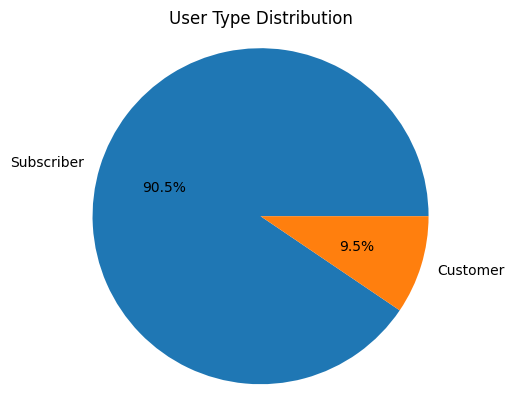

In [3]:
# Get percentage of subscribers and customer for pie chart
user_type_counts = bikeshare_df['user_type'].value_counts()
percentages = user_type_counts / user_type_counts.sum() * 100

# Create the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('User Type Distribution')

# Display the chart
plt.show();

## Distribution of Genders in Dataset

> In this visualiztion, I used a pie chart to convey the distribution of gender in this dataset. About 74.6% of members in this dataset are Male, while 23.%3% are female, and the reminding 2.1% are other. This shows most users of this service are male (almost a 3/4) while female users and other are just of over a quarter.

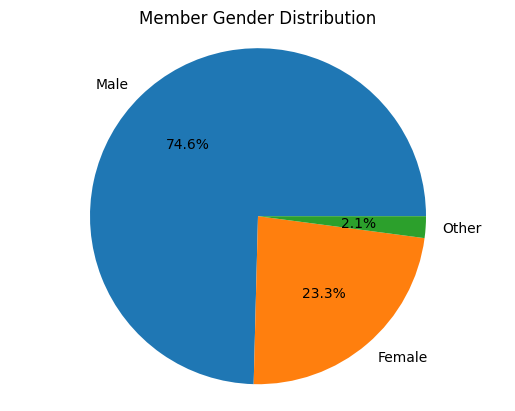

In [4]:
# Get percentage of male, female and other for pie chart
gender_counts = bikeshare_df['member_gender'].value_counts()
percentages = gender_counts / gender_counts.sum() * 100

# Create the pie chart
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Member Gender Distribution')

# Display the chart
plt.show();

## Average Age for each Gender

> In this visualization, I used a bar chart to convey the average age of users by their gender. On average, others are older at about 36 years, males are about 34 years and females are the youngest on average at 33 years old. 

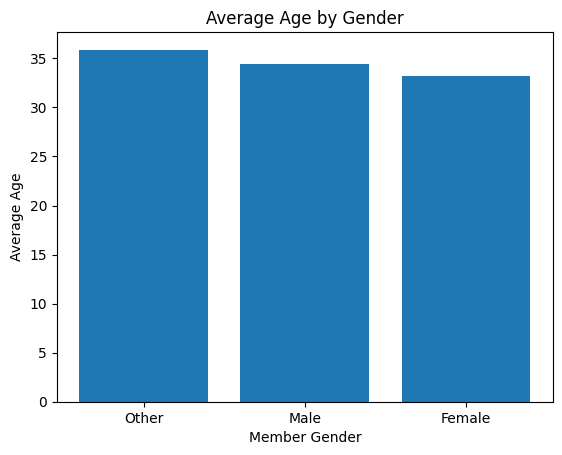

In [5]:
# Calculate the age from member_birth_year
bikeshare_df['age'] = 2019 - bikeshare_df['member_birth_year']

# Calculate the average age by gender
average_age_by_gender = bikeshare_df.groupby('member_gender')['age'].mean()

# Sort the average duration values in descending order
average_age_by_gender = average_age_by_gender.sort_values(ascending=False)

# Create the bar chart
plt.bar(average_age_by_gender.index, average_age_by_gender)

# Add labels and title
plt.xlabel('Member Gender')
plt.ylabel('Average Age')
plt.title('Average Age by Gender')

# Display the chart
plt.show();

## Average Trip Duration for each Gender

> In this visualization, I used a bar chart to convey the average trip duration of users by their gender. On average, others take longer trips at about 16 minutes, females are about 12 minute and males are take shorter trips, averaging 11 minutes.

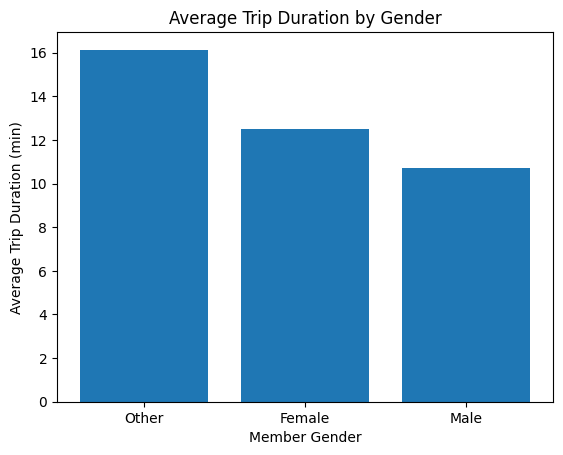

In [6]:
# Calculate the average trip duration by gender
average_duration_by_gender = bikeshare_df.groupby('member_gender')['duration_min'].mean()

# Sort the average duration values in descending order
average_duration_by_gender = average_duration_by_gender.sort_values(ascending=False)

# Create the bar chart
plt.bar(average_duration_by_gender.index, average_duration_by_gender)

# Add labels and title
plt.xlabel('Member Gender')
plt.ylabel('Average Trip Duration (min)')
plt.title('Average Trip Duration by Gender')

# Display the chart
plt.show();

## Trip Duration of User Type by Age

> In this visualization, I used a facet grid to convey the correlate trip duration of the two user type by their age. The correlation between trip duration and age is small to none, but it does seem to be on the negative side. We can see that younger users take longer trips, for subscribers and customers.

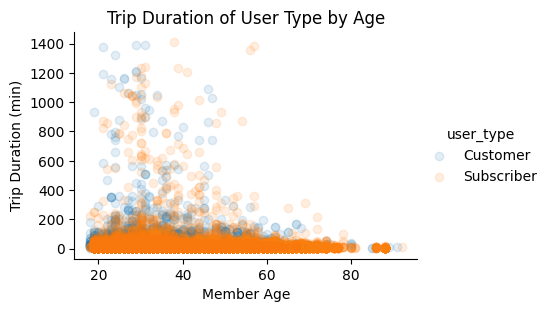

In [7]:
# Create a FacetGrid object and map the function onto each subplot
ax = sns.FacetGrid(data=bikeshare_df, hue='user_type', aspect=1.5)
ax.map(sns.regplot,'age','duration_min', scatter_kws={'alpha':0.125}, fit_reg=False);

# Add legend
ax.add_legend()

# Add labels and title
plt.xlabel('Member Age')
plt.ylabel('Trip Duration (min)')
plt.title('Trip Duration of User Type by Age');

## Trip Duration of User Type by Gender

> In this visualization, I used a clustered bar chart to convey the trip duration length of the two user type by their age. From this plot we can see that customers are more likely to take longer trips (or duration of trip is longer) than subscribers, but for both cases, other have longer trip duration, than female, and last is male.

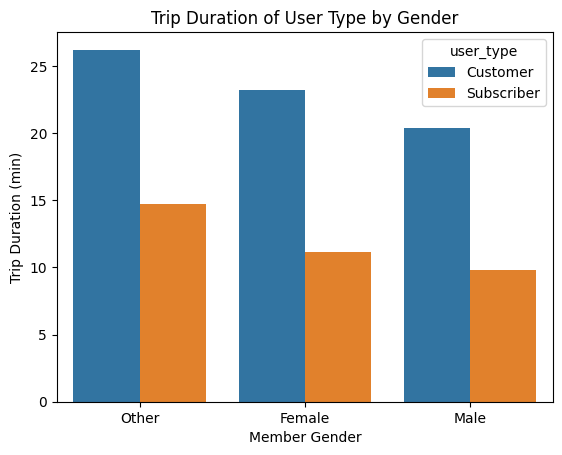

In [8]:
# Calculate the mean duration for each gender and user type
mean_duration = bikeshare_df.groupby(['member_gender', 'user_type'])['duration_min'].mean().reset_index()

# Order the bars based on the highest to lowest mean duration
order = mean_duration.groupby('member_gender')['duration_min'].mean().sort_values(ascending=False).index

# Plot the bar chart with the ordered bars
sns.barplot(data=mean_duration, x='member_gender', y='duration_min', hue='user_type', order=order)
plt.xlabel('Member Gender')
plt.ylabel('Trip Duration (min)')
plt.title('Trip Duration of User Type by Gender');